In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns = ['Games Played', 'MIN', 'PTS', 'FGM', 'AST', 'Age', 'Height', 'Weight', 'Name', 'Collage', 'REB','DREB','OREB', 'FG%', 'Pos']
df = pd.read_csv('players_stats.csv',usecols=columns)
df.head()

,Name,Games Played,MIN,PTS,FGM,FG%,OREB,DREB,REB,AST,Age,Collage,Height,Pos,Weight
0,AJ Price,26,324,133,51,37.2,6,26,32,46,29.0,University of Connecticut,185.0,PG,81.45
1,Aaron Brooks,82,1885,954,344,42.1,32,134,166,261,30.0,University of Oregon,180.0,PG,72.45
2,Aaron Gordon,47,797,243,93,44.7,46,123,169,33,20.0,University of Arizona,202.5,PF,99.00
3,Adreian Payne,32,740,213,91,41.4,48,114,162,30,24.0,Michigan State University,205.0,PF,106.65
4,Al Horford,76,2318,1156,519,53.8,131,413,544,244,29.0,University of Florida,205.0,C,110.25


In [89]:
print(df.shape)

(490, 15)


Cleaning (Removing null values)

In [76]:
# Drop rows with null values
df = df.dropna()
print(df.isnull().sum())

Name            0
Games Played    0
MIN             0
PTS             0
FGM             0
FG%             0
OREB            0
DREB            0
REB             0
AST             0
Age             0
Collage         0
Height          0
Weight          0
dtype: int64


Basic Analysis

In [77]:
# Tallest player
tallest_player = df[df['Height'] == df['Height'].max()]
print("Tallest Player:")
print(tallest_player[['Name', 'Height']])

# Heaviest player
heaviest_player = df[df['Weight'] == df['Weight'].max()]
print("\nHeaviest Player:")
print(heaviest_player[['Name', 'Weight']])

# Shortest player
shortest_player = df[df['Height'] == df['Height'].min()]
print("\nShortest Player:")
print(shortest_player[['Name', 'Height']])

# Lightest player
lightest_player = df[df['Weight'] == df['Weight'].min()]
print("\nLightest Player:")
print(lightest_player[['Name', 'Weight']])

# Average height and weight
average_height = df['Height'].mean()
average_weight = df['Weight'].mean()
print("\nAverage Height:", average_height)
print("Average Weight:", average_weight)


Tallest Player:
            Name  Height
429  Sim Bhullar   222.5

Heaviest Player:
            Name  Weight
429  Sim Bhullar   162.0

Shortest Player:
              Name  Height
182  Isaiah Thomas   172.5

Lightest Player:
           Name  Weight
1  Aaron Brooks   72.45

Average Height: 196.5857142857143
Average Weight: 98.82128571428571


Distribution of height

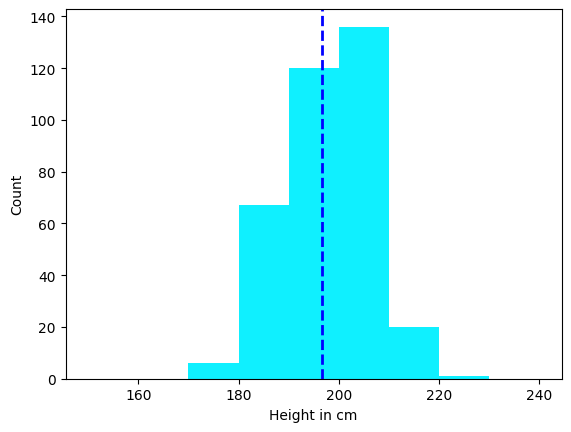

In [78]:
bins = range(150, 250, 10)
plt.hist(df["Height"], bins, histtype="bar", rwidth=1.2, color='#0ff0ff')
plt.xlabel('Height in cm')
plt.ylabel('Count')
plt.axvline(df["Height"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

Observations: The heights of the players are majorly in the range 200-210 cm followed by range 190-200 cm. The mean height as seen is around 196 cm

Distribution of wieghts

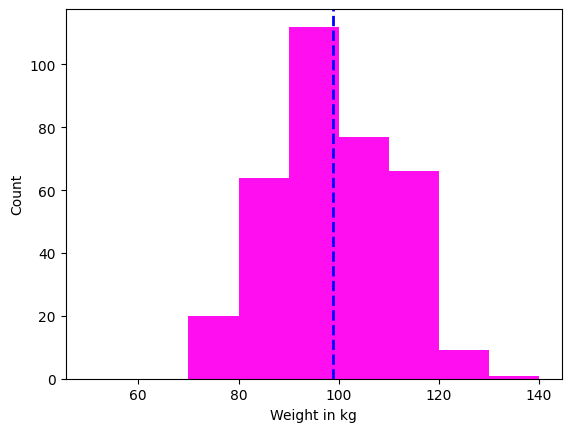

In [79]:
bins = range(50, 150, 10)
plt.hist(df["Weight"], bins, histtype="bar", rwidth=1.2, color='#ff0ff0')
plt.xlabel('Weight in kg')
plt.ylabel('Count')
plt.axvline(df["Weight"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

Observations: The weights of players are majorly in the range 90-100 kgs and the mean weight is around 99 kg

Colleges giving maximum players

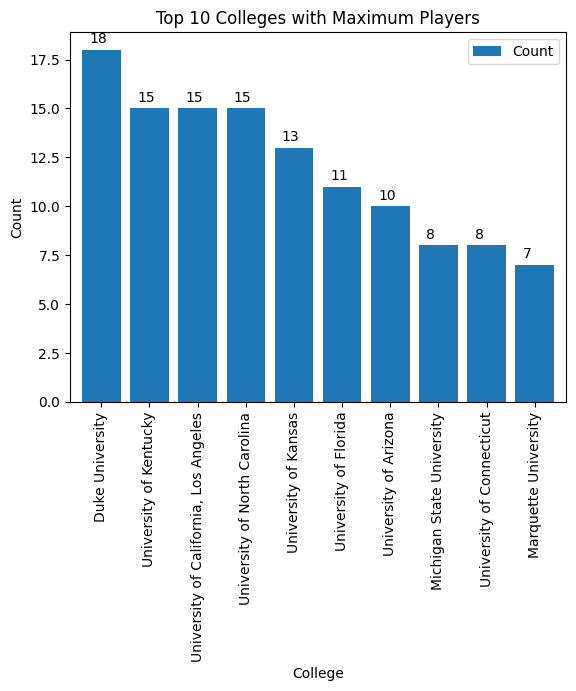

In [80]:
college_counts = df.groupby('Collage')['Height'].count().reset_index().sort_values(by='Height', ascending=False)[:10]
college_counts.set_index('Collage', inplace=True)
college_counts.columns = ['Count']

ax = college_counts.plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.35))
plt.xlabel('College')
plt.ylabel('Count')
plt.title('Top 10 Colleges with Maximum Players')
plt.show()

Comparative analysis

In [81]:
# Top Scorers
top_scorers = df.nlargest(5, 'PTS')
print("Top Scorers:")
print(top_scorers[['Name', 'PTS']])

# Most Efficient Shooters
most_efficient_shooters = df.nlargest(5, 'FG%')
print("\nMost Efficient Shooters:")
print(most_efficient_shooters[['Name', 'FG%']])

# Best Rebounders
best_rebounders = df.nlargest(5, 'REB')
print("\nBest Rebounders:")
print(best_rebounders[['Name', 'REB']])

Top Scorers:
                  Name   PTS
194       James Harden  2217
433      Stephen Curry  1900
91      Damian Lillard  1720
281      Klay Thompson  1668
292  LaMarcus Aldridge  1661

Most Efficient Shooters:
               Name   FG%
33    Arinze Onuaku  85.7
170   Greg Stiemsma  75.0
106  DeAndre Jordan  71.0
411    Ryan Hollins  64.6
169      Greg Smith  61.2

Best Rebounders:
                 Name   REB
106    DeAndre Jordan  1226
19     Andre Drummond  1104
359    Nikola Vucevic   810
109  DeMarcus Cousins   747
487     Zach Randolph   747


Correlation

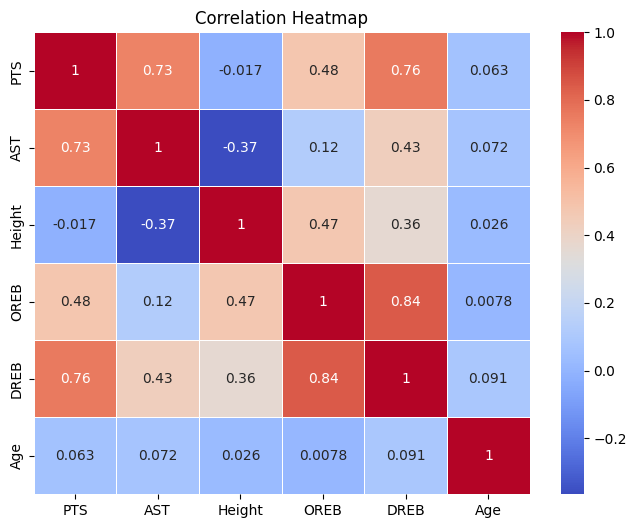

In [93]:
subset = df[['PTS', 'AST','Height','OREB', 'DREB']]

correlation_matrix = subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Some key observations:

1. DREB, OREB have positive correlation with height. It shows that taller players get more rebounds
2. Height and Assist are negatively correlated. It shows that shorter players tend to have more assists
3. Points and Assist are positively correlated. It shows that players who score can also pass ball more effectively to their teammates.

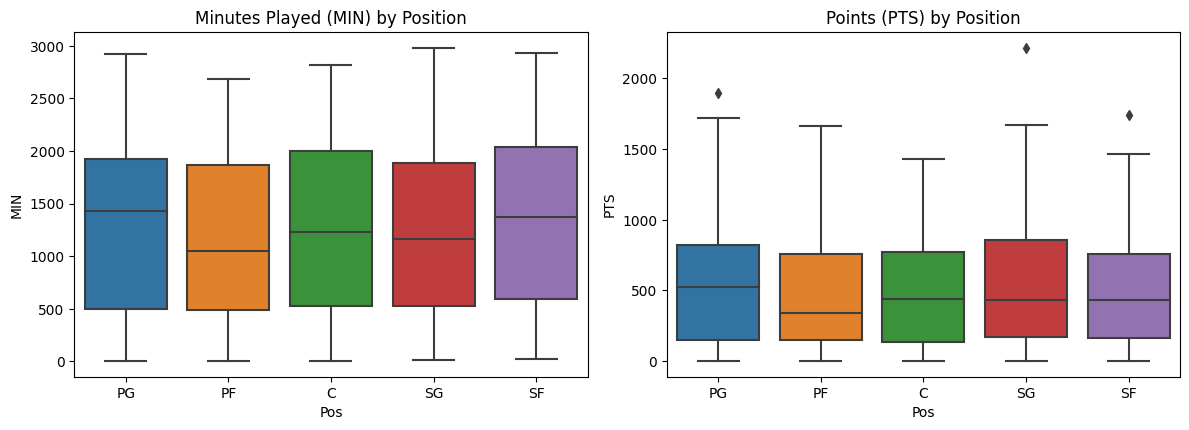

In [88]:
subset = df[['Pos', 'MIN', 'PTS']]

position_stats = subset.groupby('Pos').mean()

plt.figure(figsize=(12, 8))

# Minutes Played (MIN)
plt.subplot(2, 2, 1)
sns.boxplot(data=subset, x='Pos', y='MIN')
plt.title('Minutes Played (MIN) by Position')

# Points (PTS)
plt.subplot(2, 2, 2)
sns.boxplot(data=subset, x='Pos', y='PTS')
plt.title('Points (PTS) by Position')


plt.tight_layout()
plt.show()


Scatter plot

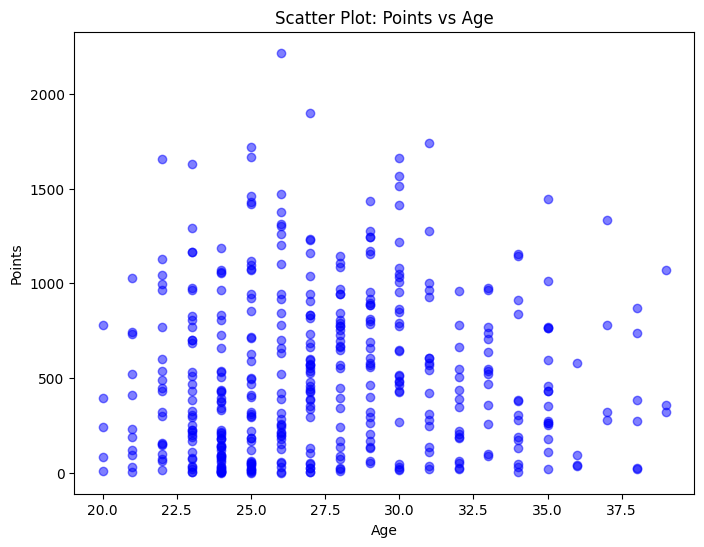

In [92]:
# Filter relevant columns
subset = df[['PTS', 'Age']]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(subset['Age'], subset['PTS'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Points vs Age')
plt.xlabel('Age')
plt.ylabel('Points')
plt.show()


Observation: There is no significant relation between Age and Points as in scatterplot it is scattered throughout. This shows that Age is not a factor in player's performance.